# Question 1:  Pose Graph Optimization for 1D SLAM

A solved example for 1D SLAM which optimizes for pose variables using weighted least squares method (Gauss Newton) has been explained in the class. You can view it at `examples/1D-SLAM.ipynb`. Your first task is to code this from scratch.

For this section, you have to calculate Jacobian analytically yourself and use it. However, you can check how correct it is using `jax`'s `jacobian`. Its usage is explained in the supplementary notebook (`examples/`).

## How to get started?

1. Go through the example and understand the optimization procedure.
2. Generate the data as in the example.
3. Write the derivatives of the function with respect to the constraints
4. Create the final jacobian and write the update steps using Gauss Newton

This tiny example will help make sense of the next question, as it's largely just an extension of this.

Finally, plot the loop closure constraint, poses, and error at every iteration as well. Since this is a one dimensional example, you can just assume x = y.

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Code!
# Generating the data
u = np.array([1.1,1.0,1.1,-2.7,0.0])
x_od = np.array([0.0,1.1,2.5,3.7,0.5])
x_gt = np.array([0.0,1,2,3,0])
covariance_mat = np.array([
    [0.01,0,0,0,0,0],
    [0,0.01,0,0,0,0],
    [0,0,0.01,0,0,0],
    [0,0,0,0.01,0,0],
    [0,0,0,0,0.01,0],
    [0,0,0,0,0,0.001],
])

info_mat = np.linalg.inv(covariance_mat)

In [3]:
def get_fx(x):
    global u
    return np.array([x[0]+u[0]-x[1],
                    x[1]+u[1]-x[2],
                    x[2]+u[2]-x[3],
                    x[3]+u[3]-x[4],
                    x[0]+u[4]-x[4],
                    x[0]-0])

J = np.array([[1,-1,0,0,0],
            [0,1,-1,0,0],
            [0,0,1,-1,0],
            [0,0,0,1,-1],
            [1,0,0,0,-1],
            [1,0,0,0,0]])

print(f"initial estimate : {get_fx(x_od)}")    

H = np.dot(np.dot(J.T,info_mat),J)
H_inv = np.linalg.inv(H)
JtIt = np.dot(J.T,info_mat.T)


initial estimate : [ 0.  -0.4 -0.1  0.5 -0.5  0. ]


In [4]:
import copy
epoch = 10
x = copy.deepcopy(x_od) 
for i in range(epoch):
    print(f"MSE at {i}th iteration is :{np.mean((x-x_gt)**2)}")
    b = np.dot(JtIt,get_fx(x))
    dx = np.dot(H_inv,-b)
    x = x + dx
    

MSE at 0th iteration is :0.20000000000000004
MSE at 1th iteration is :0.005999999999999993
MSE at 2th iteration is :0.005999999999999981
MSE at 3th iteration is :0.005999999999999997
MSE at 4th iteration is :0.005999999999999994
MSE at 5th iteration is :0.005999999999999994
MSE at 6th iteration is :0.005999999999999994
MSE at 7th iteration is :0.005999999999999994
MSE at 8th iteration is :0.005999999999999994
MSE at 9th iteration is :0.005999999999999994


In [10]:
print(f"Ground Truth : {x_gt}")
print(f"Initial Estimate : {x_od}")
print(f"Final Estimate : {x}")

Ground Truth : [0. 1. 2. 3. 0.]
Initial Estimate : [0.  1.1 2.5 3.7 0.5]
Final Estimate : [2.15704154e-32 1.00000000e+00 1.90000000e+00 2.90000000e+00
 1.00000000e-01]


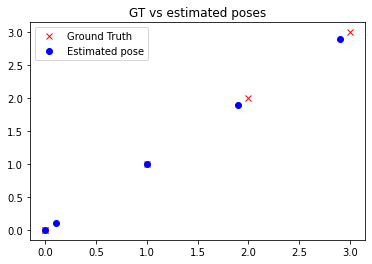

In [18]:
plt.plot(x_gt,x_gt,'x',color="r")
plt.plot(x,x,'o',color="b")
plt.title('GT vs estimated poses')
plt.legend(['Ground Truth','Estimated pose'])